# OASIS INFOBYTE INTERN,AUGUST -2023

Naveen S -- Data Science Intern 

TASK 1   

IRIS FLOWER CLASSIFICATION:

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their measurements.

Now assume that you have the measurements of the iris flowers according to their species, 

and here your task is to train a machine learning model that can learn from the measurements of the iris species and classify them.

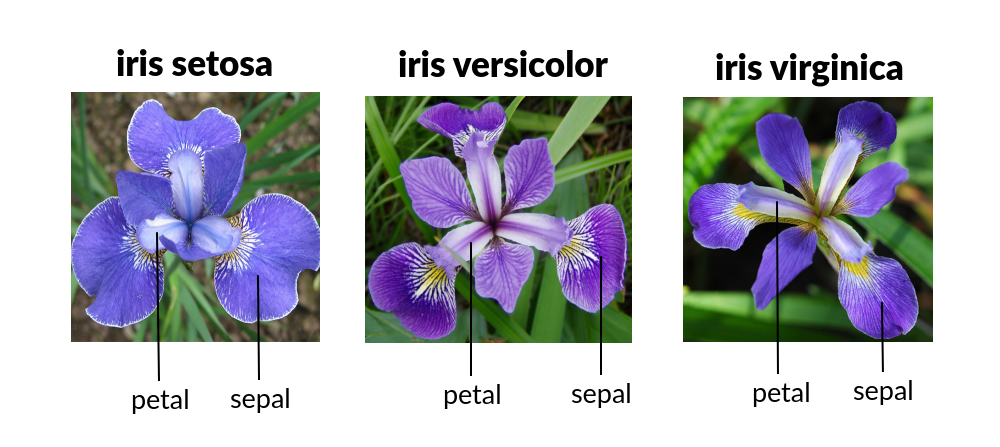

In [1]:
from IPython.display import Image
Image(filename=r"C:\Users\NAVEEN\OasisImages\iris img.png",width=800,height=900)

# import Libraries:

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# loading the Data:

In [3]:
iris_df=pd.read_csv(r"C:\Users\NAVEEN\oasisdatas\Irisintern.csv")
print("the data is loaded successfully")

the data is loaded successfully


In [4]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# DATA PROCESSING:

In [6]:
iris_df.shape

(150, 6)

In [7]:
iris_df.size

900

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [11]:
n=iris_df.isnull().sum()
print(n)
print("no null value in dataset")

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
no null value in dataset


In [12]:
print("unique number of values in dataset Species:",iris_df["Species"].nunique())
print("Unique Species in iris dataset:",iris_df["Species"].unique())

unique number of values in dataset Species: 3
Unique Species in iris dataset: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


# PAIRPLOT:

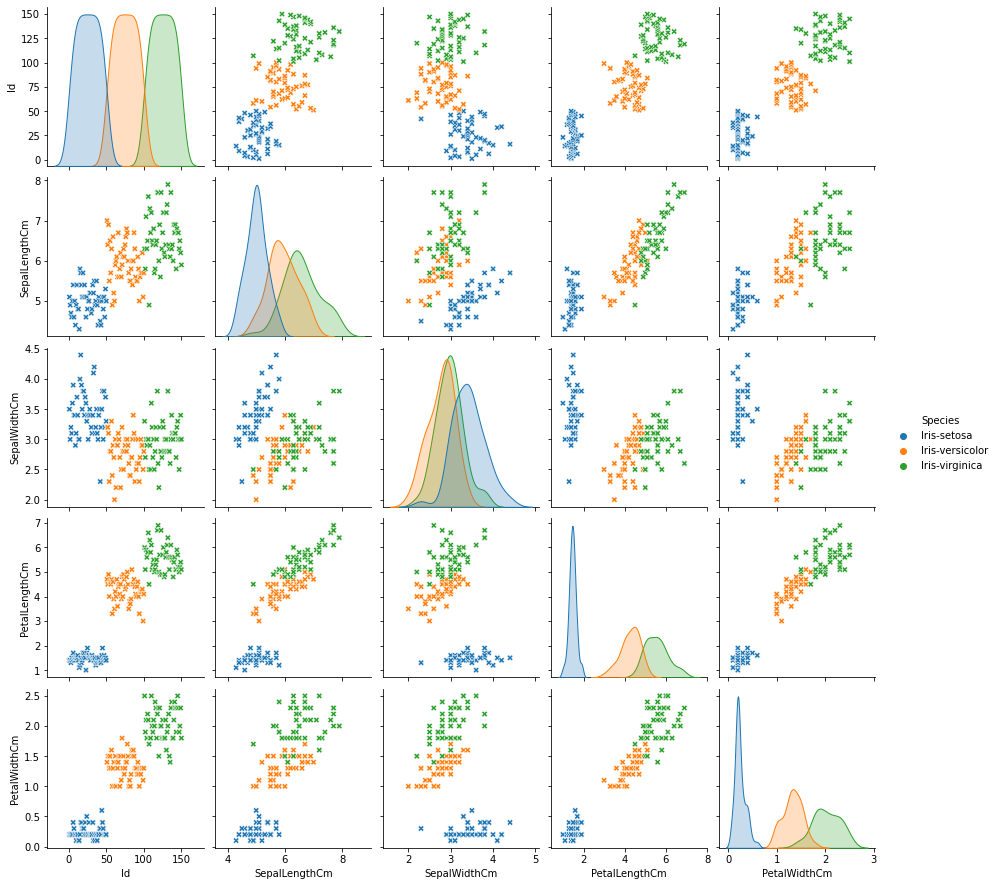

In [13]:
sns.pairplot(iris_df, hue = "Species",markers = "X")
plt.show()


It shows that Iris-Setosa is separated from both other species in all features.

# Data Visualization:

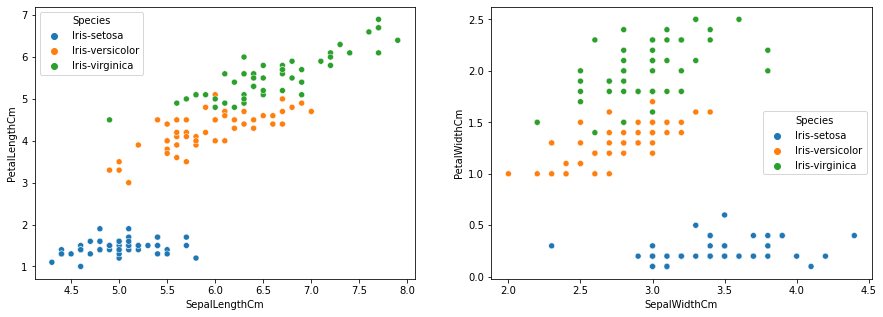

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',data=iris_df,hue='Species')
plt.subplot(1,2,2)
sns.scatterplot(x='SepalWidthCm',y='PetalWidthCm',data=iris_df,hue='Species')
plt.show()

In [15]:
#To Check correlation
iris_df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


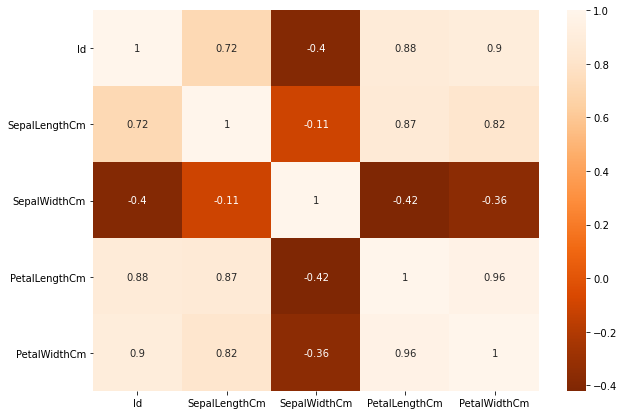

In [16]:
#Use Heatmap to
plt.figure(figsize=(10,7))
sns.heatmap(iris_df.corr(),annot = True,cmap = "Oranges_r")
plt.show()

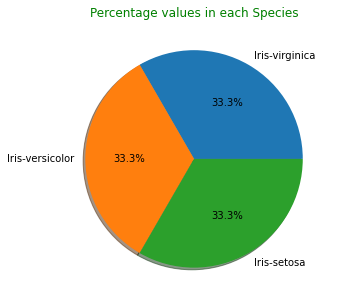

In [17]:
# Check value counts
iris_df["Species"].value_counts().plot(kind="pie",autopct = "%1.1f%%",shadow=True, figsize=(5,5))
plt.title("Percentage values in each Species", fontsize = 12 , c = "g")
plt.ylabel("",fontsize=10,c="r")
plt.show()


1.We can see ,all Species has equal values in dataset.
2.Iris-Setosa:50
3.Iris- Versicolor:50
4.Iris- Virginica : 50

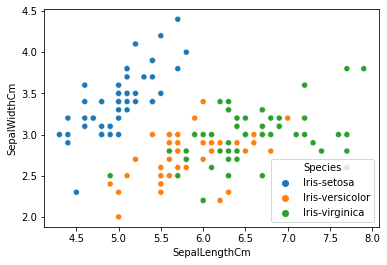

In [18]:
# Scatterplot for Sepal Length and Sepal Width
sns.scatterplot(iris_df["SepalLengthCm"], iris_df["SepalWidthCm"], hue = iris_df["Species"])
plt.show()

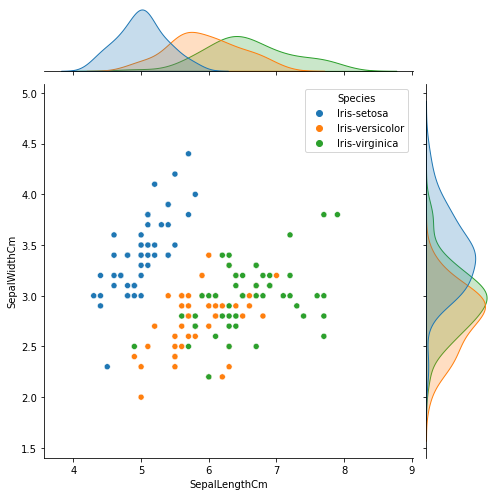

In [19]:
sns.jointplot(data = iris_df , x = "SepalLengthCm", y = "SepalWidthCm" , size = 7 , hue = "Species")
plt.show()


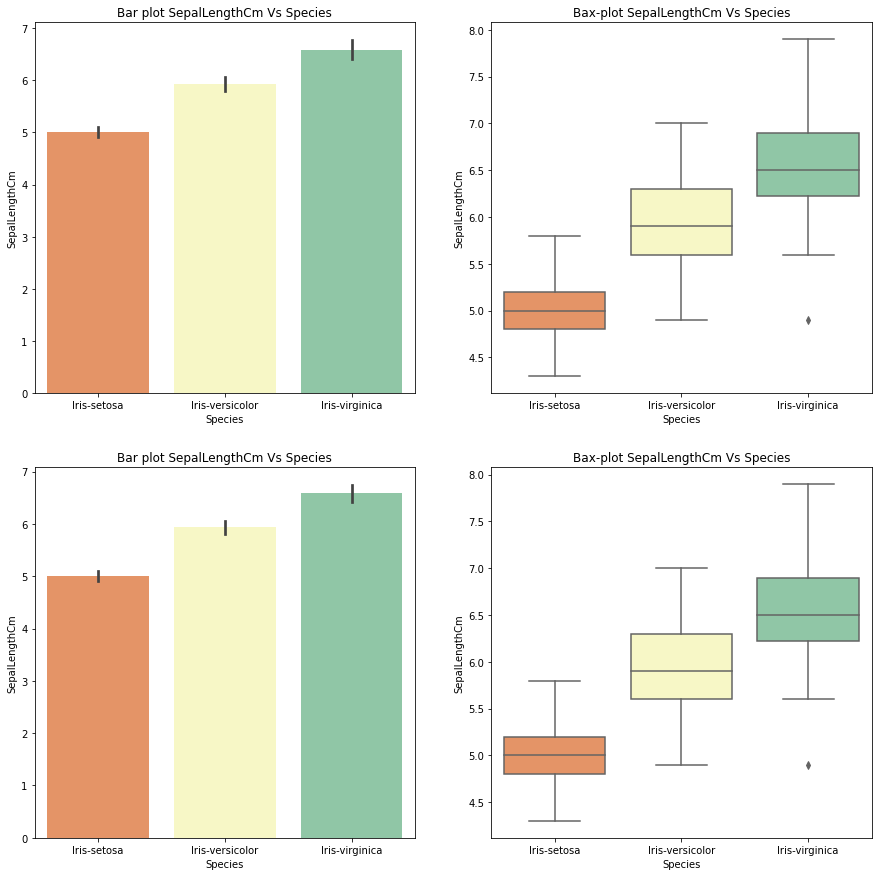

In [20]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bar plot SepalLengthCm Vs Species")

plt.subplot(2,2,2)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bax-plot SepalLengthCm Vs Species")

plt.subplot(2,2,3)
sns.barplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bar plot SepalLengthCm Vs Species")

plt.subplot(2,2,4)
sns.boxplot(x = "Species",y = "SepalLengthCm", data=iris_df, palette=("Spectral"))
plt.title("Bax-plot SepalLengthCm Vs Species")
plt.show()


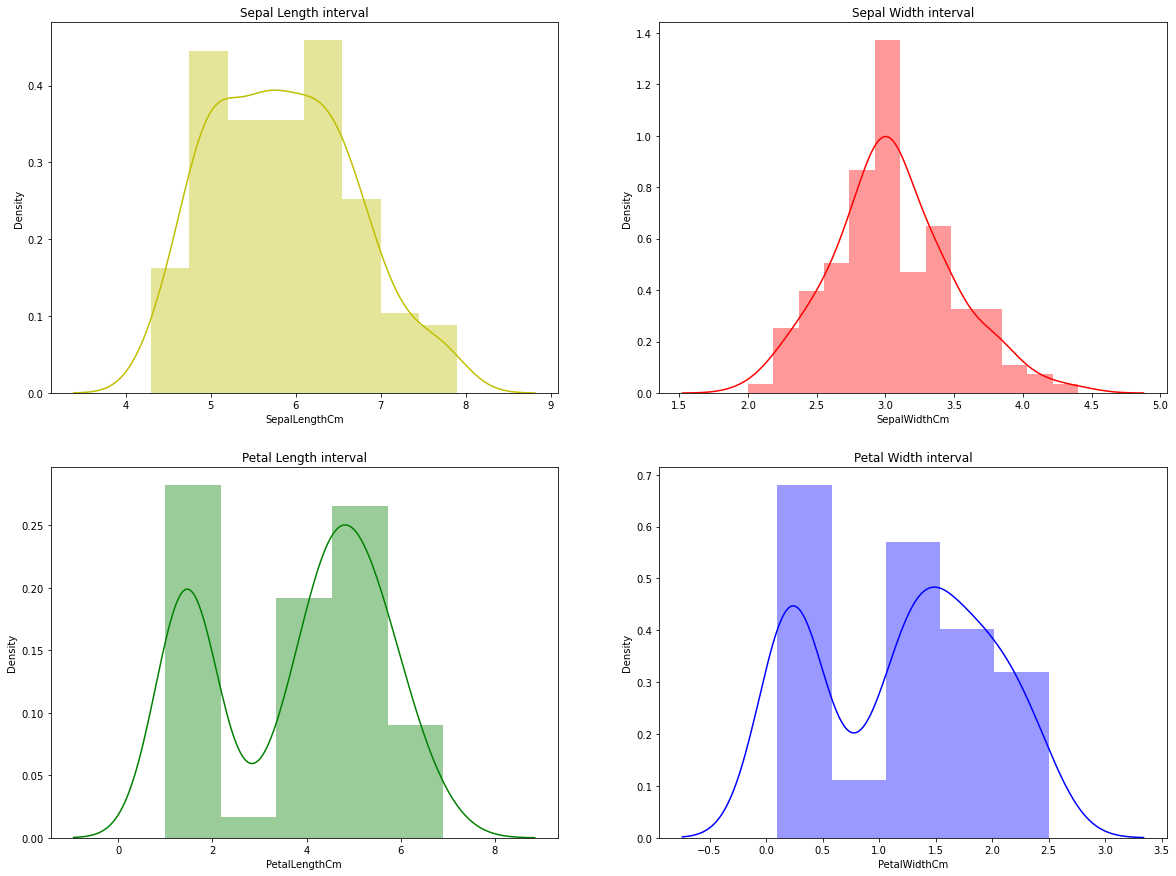

In [21]:
#Distribution Plot 
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(iris_df["SepalLengthCm"],color="y").set_title("Sepal Length interval")
plt.subplot(2,2,2)
sns.distplot(iris_df["SepalWidthCm"],color="r").set_title("Sepal Width interval")
plt.subplot(2,2,3)
sns.distplot(iris_df["PetalLengthCm"],color="g").set_title("Petal Length interval")
plt.subplot(2,2,4)
sns.distplot(iris_df["PetalWidthCm"],color="b").set_title("Petal Width interval")
plt.show()

In [22]:
X = iris_df.iloc[:,[0,1,2,3]]
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4


In [23]:
y = iris_df.iloc[:, - 1]
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [24]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


# Model Building

#Supervised Machine Learning


#Split data into Training and Testing Set

In [25]:
x= iris_df.drop("Species", axis=1)
y= iris_df["Species"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("Y_train.shape:", y_train.shape)
print("Y_test.shape:", y_test.shape)

X_train.shape: (120, 4)
X_test.shape: (30, 4)
Y_train.shape: (120,)
Y_test.shape: (30,)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
x_new= np.array([[151, 5, 2.9, 1]])
prediction= knn.predict(x_new)
print("Prediction: {}".format(prediction))

Prediction: ['Iris-virginica']


In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(120, 4)
(30, 4)
(120,)
(30,)


# 6 Different Algorithm

# Logistic Regression
# Random forest classifier
# Decision Tree classifier
# Support Vector Machine
# K-NN Classifier 
# Naive Bayes 

In [31]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic regression successfully implemented")
y_pred = lr.predict(X_test)
y_pred


Logistic regression successfully implemented


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:-")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is:-",accuracy*100)
print("Classification Report:-")
print(classification_report(y_test,y_pred))

Confusion Matrix:-
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is:- 100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("Rndom Forest Classifier successfully Implimented")
y_pred = rfc.predict(X_test)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)

#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Rndom Forest Classifier successfully Implimented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
print("Decision Tree Algorithm is successfully implimented.")
y_pred = dtree.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy:-  96.66666666666667
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



# For Visualzing the Decision Tree

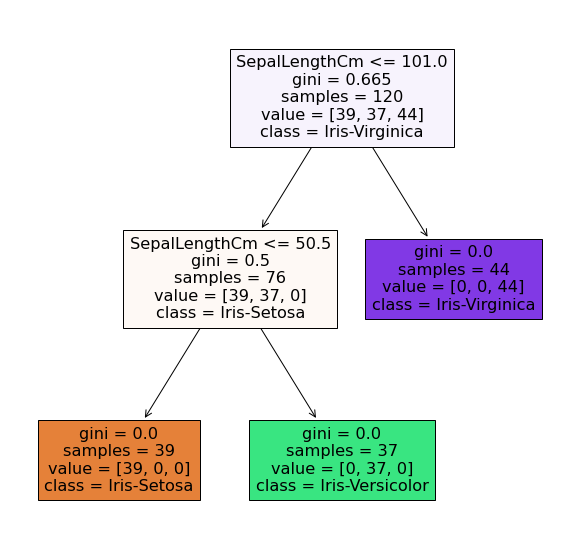

In [35]:
from sklearn.tree import plot_tree

feature = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes = ['Iris-Setosa','Iris-Versicolor','Iris-Virginica']
plt.figure(figsize=(10,10))
plot_tree(dtree, feature_names = feature, class_names = classes, filled = True);

In [36]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train, y_train)
print("Support vactor classifier is successfully implemented")
y_pred = svc.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Support vactor classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, y_train)
print("K-Nearest Neighbors classifier is successfully implemented")
y_pred = knn.predict(X_test)
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:- ")
print(cm)
#accuracy test
accuracy = accuracy_score(y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Naive Bayes is successfully implemented")
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_pred, y_test)
print("Confusion Matrix:- ")
print(cm)
# Accuracy test
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print( classification_report(y_test, y_pred))

Naive Bayes is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy:-  100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Result
1. Accuracy of Logistic Regression :- 100%
2. Accuracy of Random Forest Classifier:-100%
3. Accuracy of Decision Tree :- 96.66%
4. Accuracy of Support Vector Machine :- 100%
5. Accuracy of K-NN Classifier :- 100%
6. Accuracy of Naive Bayes :- 100%

# TESTING THE  MODEL

In [39]:
 input_data=(4.9,3.0,1.4,0.2)
#changing the input data to a numpy array
input_data_as_nparray = np.asarray(input_data)
#reshape the data as we are predicting the label for only the instance
input_data_reshaped = input_data_as_nparray.reshape(1,-1)
prediction = dtree.predict(input_data_reshaped)
print("The category is",prediction)

The category is ['Iris-setosa']


# Thank You